In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from utils import ProgBar, ResultFormarter
import pandas as pd
import pickle as pk

In [13]:
constructor = ResultFormarter("MLP_hyperparameters_study/")


In [14]:
results_dict = constructor.get_results()


In [15]:
constructor = ResultFormarter("MLP_hyperparameters_study/")
results_dict = constructor.get_results()

bar = ProgBar(30, "Calculing PDFs...")

for batch_size in results_dict:
    for encoding_dim in results_dict[batch_size]:
        RMSE = results_dict[batch_size][encoding_dim][:, 0]
        Target = results_dict[batch_size][encoding_dim][:, 1]

        # getting attributes values

        att_background = RMSE[Target == 0]

        att_signal = RMSE[Target == 1]

        # computing the attribute distribution

        bg_kernel = stats.gaussian_kde(att_background)

        sg_kernel = stats.gaussian_kde(att_signal)

        # defining attributes limits

        bg_max = max(att_background)

        bg_min = min(att_background)

        sg_max = max(att_signal)

        sg_min = min(att_signal)

        # creating values interval for time optimization

        bg_eval = np.linspace(bg_min, bg_max, num=200)

        sg_eval = np.linspace(sg_min, sg_max, num=200)

        eval = np.hstack((bg_eval, sg_eval))

        # calculating the likelyhood with kde kernel

        bg_likelyhood = bg_kernel(bg_eval)

        sg_likelyhood = sg_kernel(sg_eval)

        distribution_data = np.hstack((bg_likelyhood, sg_likelyhood))

        # creating distribution targets

        new_target = np.zeros(len(distribution_data))

        new_target[200:] = 1

        target_names = []

        for tg in new_target:
            if tg == 0:
                target_names.append("Anomalia")

            else:
                target_names.append("Normal")

        results_dict[batch_size][encoding_dim] = pd.DataFrame(
            data=np.vstack((distribution_data, target_names, eval)).T,
            columns=["likelyhood", "target", "RMSE"],
        )

        bar.update()

with open("plotly_seed.pkl", "wb") as f:
    pk.dump(results_dict, f)


Calculing PDFs...
[--------------------------------------------------] 100.00% - 30 of 30

Calculing PDFs...
[--------------------------------------------------] 100.00% - 30 of 30

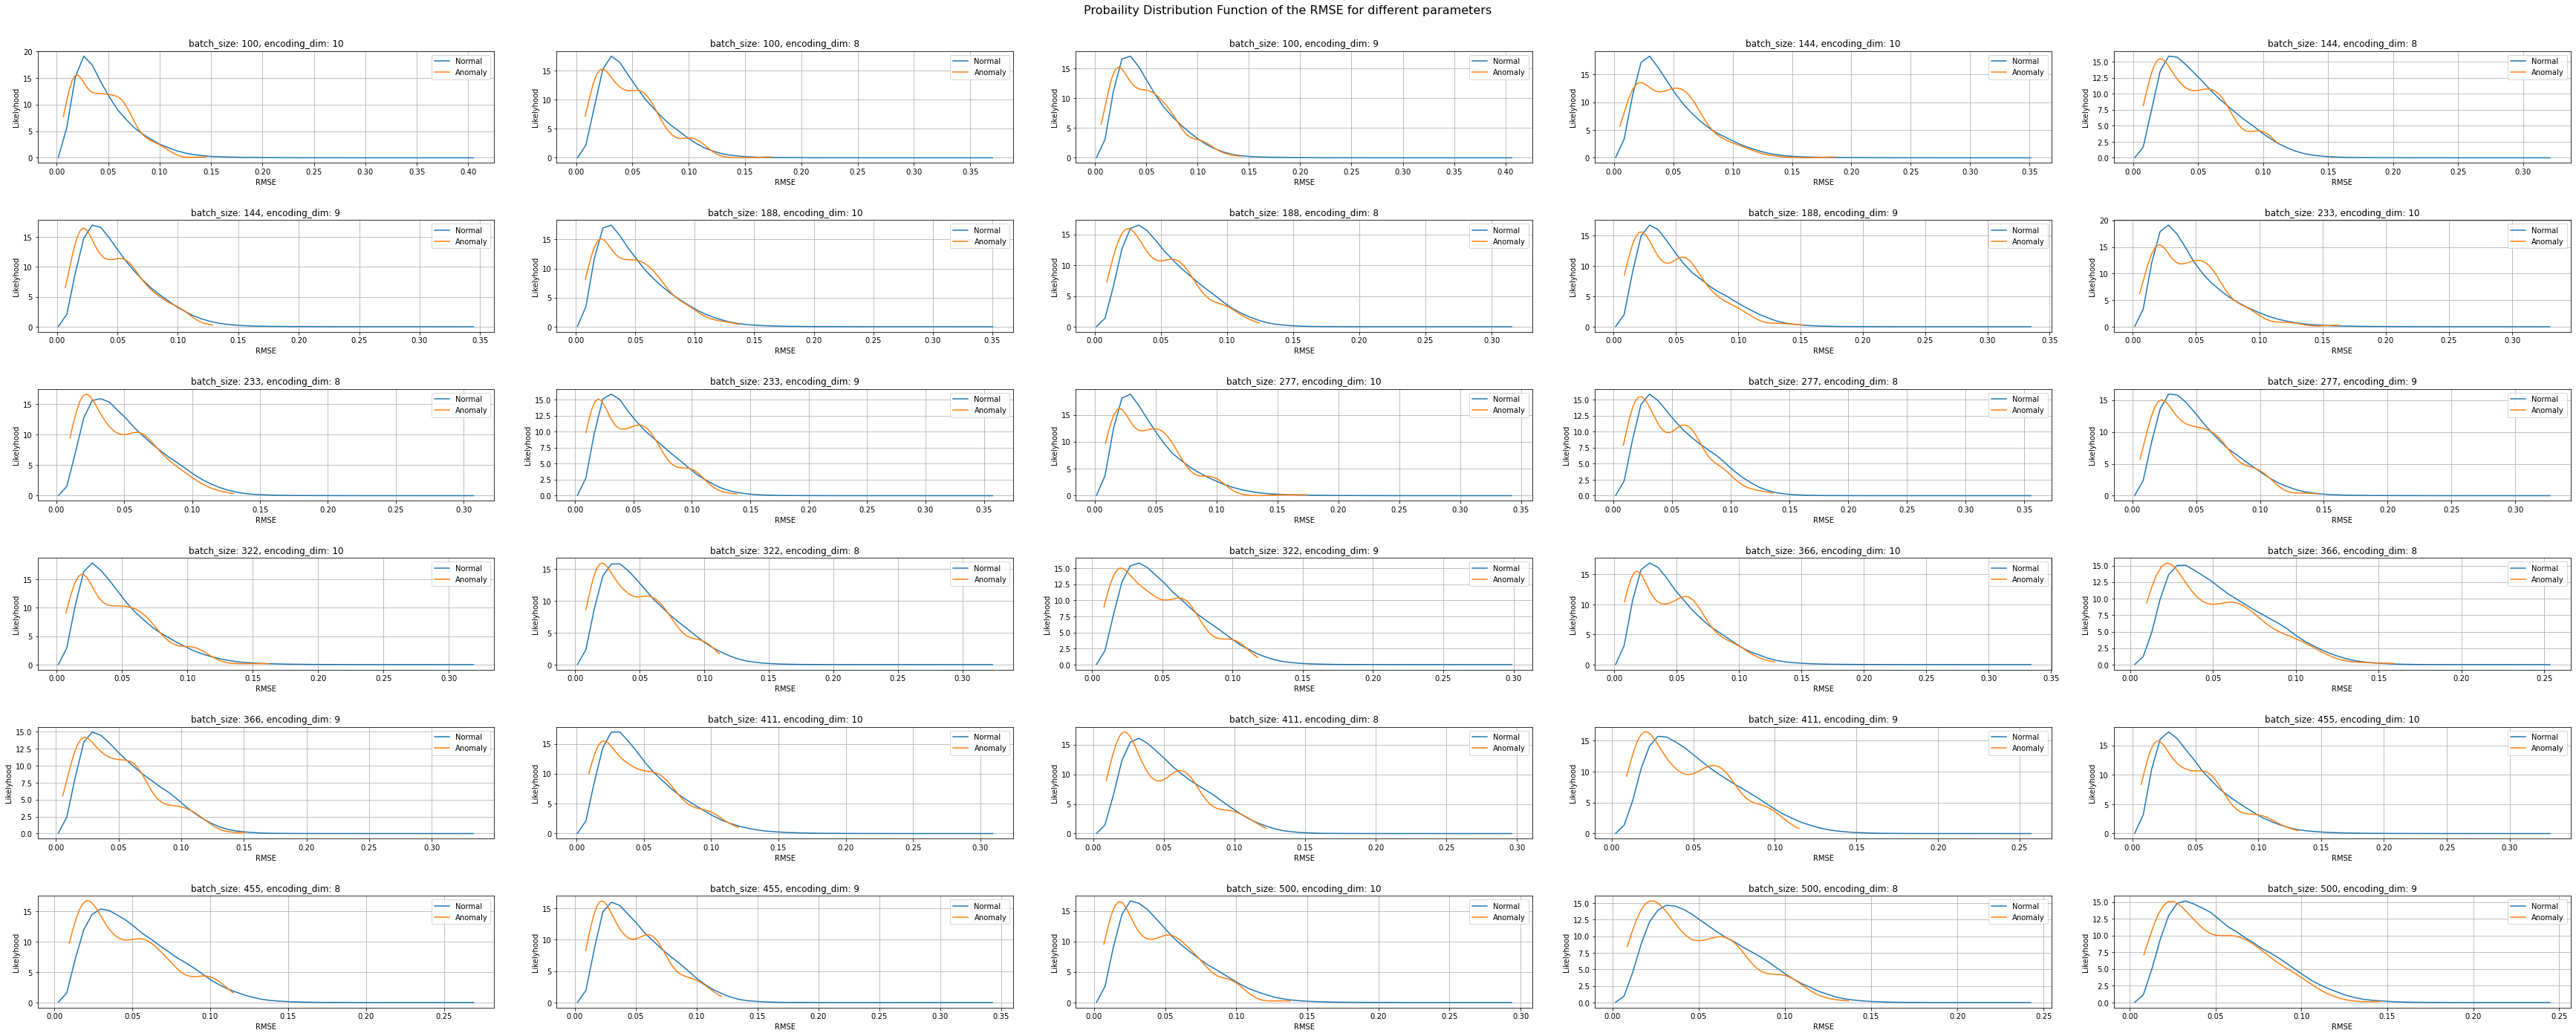

In [11]:
bg_eval_list = []

sg_eval_list = []

size_scaler = 8

fig = plt.figure(figsize= (6.1 * size_scaler, 2.5 * size_scaler))

ax = fig.subplots(6,5)

fig.suptitle('Probaility Distribution Function of the RMSE for different parameters', fontsize=16)

bar = ProgBar(30,"Calculing PDFs...")

i = 0

for batch_size in results_dict:
    for encoding_dim in results_dict[batch_size]:
        RMSE = results_dict[batch_size][encoding_dim][:,0]
        Target = results_dict[batch_size][encoding_dim][:,1]

        # getting attributes values

        att_background = RMSE[Target==0]

        att_signal = RMSE[Target==1]

        # computing the attribute distribution

        bg_kernel = stats.gaussian_kde(att_background)

        sg_kernel = stats.gaussian_kde(att_signal)

        # defining attributes limits

        bg_max = max(att_background)

        bg_min = min(att_background)

        sg_max = max(att_signal)

        sg_min = min(att_signal)

        # creating values interval for time optimization

        bg_eval = np.linspace(bg_min,bg_max,num=50)

        sg_eval = np.linspace(sg_min,sg_max,num=50)


        # appending values interval the following analysis

        bg_eval_list.append(bg_eval)

        sg_eval_list.append(sg_eval)

        # calculating the likelyhood with kde kernel

        bg_likelyhood = bg_kernel(bg_eval)

        sg_likelyhood = sg_kernel(sg_eval)

        # defining plot locationg

        line = int(i//5)

        col = int(i%5)

        # ploting results

        ax[line,col].plot(bg_eval, bg_likelyhood, 
                ms=3.5, linestyle='-',
                label= 'Normal')

        ax[line,col].plot(sg_eval, sg_likelyhood, 
                ms=3.5, linestyle='-',
                label= 'Anomaly')
        ax[line,col].legend()
        ax[line,col].set_title("batch_size: " + batch_size + ', ' + 'encoding_dim: ' + encoding_dim)
        ax[line,col].set_xlabel("RMSE")
        ax[line,col].set_ylabel("Likelyhood")
        ax[line,col].grid()

        i += 1

        bar.update()

fig.tight_layout(pad=3.0)

plt.savefig('Figures/MLP-RMSE-PDF.png',format='png')

del fig

In [14]:
import glob

results_list = glob.glob('LSTM_hyperparameters_study/Results/*')

In [17]:
import argparse

parser = argparse.ArgumentParser(description = '', add_help = False)
parser = argparse.ArgumentParser()


parser.add_argument('-b','--batch_size', action='store',
        dest='batch_size',
            help = "Batch size.")

parser.add_argument('-e','--encoding_dim', action='store',
        dest='encoding_dim', default = None,
            help = "Number o neurons in the first layer.")

parser.add_argument('-t','--time_step', action='store',
        dest='time_step', default = None,
            help = "Number of time instances to use.")

parser.add_argument('-f','--file', action='store',
        dest='file', default = None,
            help = "The subset file.")

args = parser.parse_args()

In [25]:
var_dict = vars(args)

var_dict

{'batch_size': None,
 'encoding_dim': None,
 'time_step': None,
 'file': '/home/thiago/.local/share/jupyter/runtime/kernel-9bd38f40-6683-4ea2-91e3-e286f491365a.json'}

In [34]:
def 
    results_files = glob.glob("LSTM_hyperparameters_study/Results/*")
    results_list = [result.split("/")[-1].split(".")[0] for result in results_files]

    results_dict = {}

    for result in results_list:
        result_tuples = result.split('__')
        for tuple in result_tuples:
            hyperparameter, value = tuple.split('--')

            if not results_dict:
                results_dict[hyperparameter] = {}

                if not results_dict[hyperparameter]:
                    results_dict[hyperparameter] = {}

                    return results_dict


            print(hyperparameter, value)



batch_size 500
encoding_dim 20
time_step 3
it 3
batch_size 500
encoding_dim 20
time_step 3
it 5
batch_size 500
encoding_dim 20
time_step 3
it 1
batch_size 500
encoding_dim 20
time_step 3
it 6
batch_size 500
encoding_dim 20
time_step 3
it 10
batch_size 500
encoding_dim 20
time_step 3
it 0
batch_size 500
encoding_dim 20
time_step 3
it 8
batch_size 500
encoding_dim 20
time_step 3
it 7
batch_size 500
encoding_dim 20
time_step 3
it 4
batch_size 500
encoding_dim 20
time_step 3
it 2
batch_size 500
encoding_dim 20
time_step 3
it 9
